In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/input2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data = pd.read_csv("Iris.csv")

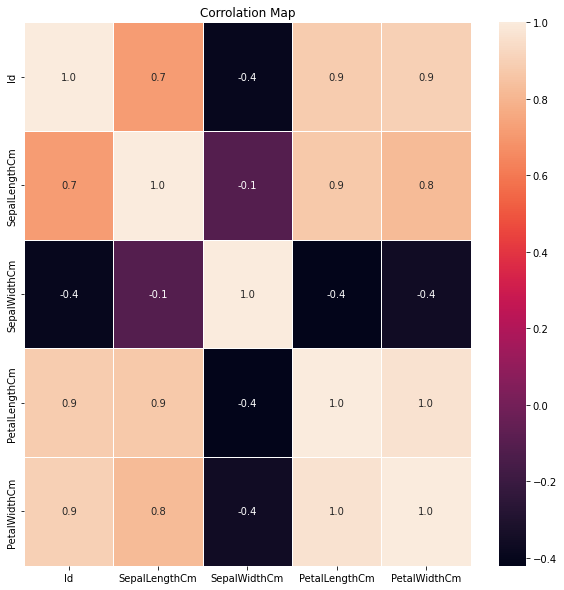

In [5]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Corrolation Map")
plt.show()

In [6]:
data.drop(["Id"], axis=1, inplace=True)
x_data = data.iloc[:,:4].values
y = data.iloc[:,4:].values
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x[:5]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Accuracy for Logistic Regression : ", lr.score(x_test, y_test))
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression : \n", cm_lr)

Accuracy for Logistic Regression :  0.7
Confusion Matrix for Logistic Regression : 
 [[11  0  0]
 [ 0  4  9]
 [ 0  0  6]]


 5nn score: 0.9666666666666667 


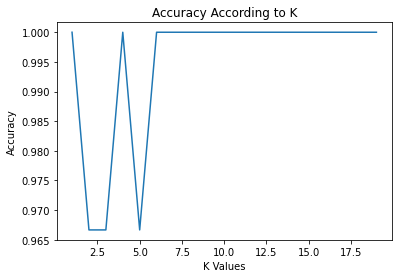

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print(" {}nn score: {} ".format(5,knn.score(x_test, y_test)))

score_list = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
score_list

plt.plot(range(1,20),score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Accuracy According to K")
plt.show()